### 1.Setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#tf.logging.set_verbosity(tf.logging.ERROR) 

print("tf version: {}".format(tf.__version__))
tf.set_random_seed(1)
np.random.seed(1)

/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/pyt

tf version: 1.14.0


### 2. Generate the random function and sample some data

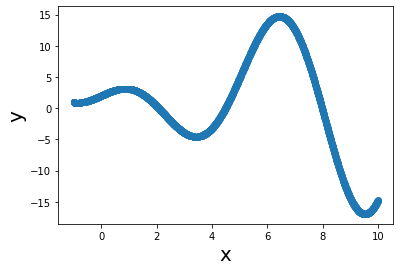

In [2]:
x = np.linspace(-1, 10, 2000)[:, np.newaxis]
noise = np.random.normal(0, 0.01, size=x.shape)
y = np.cos(x)*2*x + 2 

plt.scatter(x,y)
plt.xlabel('x', fontsize = 20)  
plt.ylabel('y', fontsize = 20)
plt.show()

### 3. Build the neural network 

#### 3.1 setup the neural network

In [3]:
input_x = tf.placeholder(tf.float32, [None, 1]) 
output_y = tf.placeholder(tf.float32, [None, 1]) 

with tf.variable_scope("DNN_1_model"):
    h1_a = tf.layers.dense(inputs=input_x, units=5, activation=tf.nn.relu, name='h1_a')
    h2_a = tf.layers.dense(inputs=h1_a, units=10, activation=tf.nn.relu, name='h2_a')
    h3_a = tf.layers.dense(inputs=h2_a, units=10, activation=tf.nn.relu, name='h3_a') 
    h4_a = tf.layers.dense(inputs=h3_a, units=10, activation=tf.nn.relu, name='h4_a')
    h5_a = tf.layers.dense(inputs=h4_a, units=10, activation=tf.nn.relu, name='h5_a') 
    h6_a = tf.layers.dense(inputs=h5_a, units=10, activation=tf.nn.relu, name='h6_a') 
    h7_a = tf.layers.dense(inputs=h6_a, units=5, activation=tf.nn.relu, name='h7_a') 
    output_a = tf.layers.dense(inputs=h7_a, units=1, name='output_a')
    

    
with tf.variable_scope("DNN_2_model"):
    h1_b = tf.layers.dense(inputs=input_x, units=190, activation=tf.nn.relu, name='h1_b')
    output_b = tf.layers.dense(inputs=h1_b, units=1, name='output_b')
    
    
trainable_variable_a = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "DNN_1_model")
trainable_variable_b = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "DNN_2_model")
loss_a = tf.losses.mean_squared_error(output_y, output_a)
loss_b = tf.losses.mean_squared_error(output_y, output_b)
optimizer_a = tf.train.AdamOptimizer(learning_rate=0.005)
optimizer_b = tf.train.AdamOptimizer(learning_rate=0.005)
train_op_a = optimizer_a.minimize(loss_a, var_list= trainable_variable_a)
train_op_b = optimizer_b.minimize(loss_b, var_list= trainable_variable_b)


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### 3.2 play with the parameters

In [4]:
def get_total_para_num(tf_variables):
    total_parameters = 0
    for variable in tf_variables:
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
    return total_parameters

print(get_total_para_num(trainable_variable_a))
print(get_total_para_num(trainable_variable_b))

571
571


#### 3.3 train the network

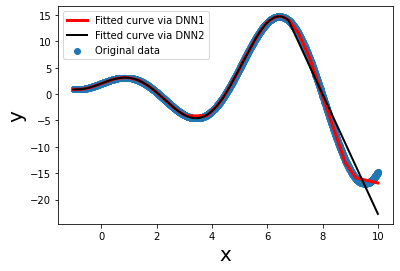

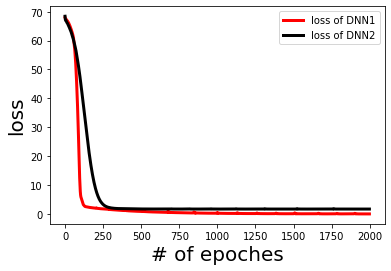

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    list_loss_a = []
    list_iter = []
    list_loss_b = []
    
    for iteration in range(2000):
        _, _, l_a, l_b= sess.run([train_op_a, train_op_b, loss_a, loss_b], feed_dict={input_x: x, output_y: y})
        if iteration % 2 == 0:
            list_loss_a.append(l_a)
            list_loss_b.append(l_b)
            list_iter.append(iteration)

    pred_a, pred_b = sess.run([output_a, output_b], feed_dict={input_x: x})
        
#plt.cla()
plt.scatter(x, y, label = "Original data")
plt.plot(x, pred_a, 'r-', lw=3, label = "Fitted curve via DNN1")
plt.plot(x, pred_b, 'k-', lw=2, label = "Fitted curve via DNN2")
plt.legend()
plt.xlabel("x", fontsize = 20)
plt.ylabel("y", fontsize = 20)
#plt.title("Fitting performance", fontsize = 20)


plt.show()



plt.plot(list_iter,list_loss_a, 'r-', lw=3, label = "loss of DNN1")
plt.plot(list_iter,list_loss_b, 'k-', lw=3, label = "loss of DNN2")
plt.xlabel("# of epoches", fontsize = 20)
plt.ylabel("loss", fontsize = 20)
plt.legend()
#plt.title("Training performance", fontsize = 20)
plt.show()